In [10]:
!pip install easypreprocessing

  error: subprocess-exited-with-error

Defaulting to user installation because normal site-packages is not writeable


  python setup.py egg_info did not run successfully.

  exit code: 1

  [15 lines of output]

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)

  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'

  Preparing metadata (setup.py): started

  rather than 'sklearn' for pip commands.

  Preparing metadata (setup.py): finished with status 'error'



  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above 

In [51]:
pip install kneed  xgboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/150.0 MB 7.1 MB/s eta 0:00:21
    --------------------------------------- 3.1/150.0 MB 8.4 MB/s eta 0:00:18
   - -------------------------------------- 5.2/150.0 MB 9.1 MB/s eta 0:00:16
   - -------------------------------------- 7.3/150.0 MB 9.2 MB/s eta 0:00:16
   -- ------------------------------------- 9.4/150.0 MB 9.6 MB/s eta 0:00:15
   --- ------------------------------------ 12.3/150.0 MB 10.2 MB/s eta 0:00:14
   --- ------------------------------------ 14.9/150.0 MB 10.4 MB/s eta 0:00:13
   ---- ----------------------------------- 17.0/150.0 MB 10.6 MB/s eta 0:00:13
   ----- ---------------------------------- 19.9/150.0 MB 10.9 MB/s eta 0:00:12
   ----- ---------------------------------- 22.3/150.0 MB 10.9 MB/s eta 0:00:12
   ------ --------------------------------- 24.6/150.0 MB 11.

In [53]:
import numpy as np
import pandas as pd
from easypreprocessing import EasyPreProcessing
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
import xgboost

Easypreprocessing is a library used for common ML related preprocessing activities.

In [3]:
prep = EasyPreProcessing('C:/Users/Woodpecker/Documents/optest/data.csv')


**Initialization Parameters**

1.  output            - Set output variable/dependent variable
2.  dates.features    - Set datetime field names (optional)

For example:
1.  output = 'column_name'
2.  dates.features = ['date_field_1','date_field_2']
        

In [5]:
prep.info



**General Template**
<code>
from easypreprocessing import EasyPreProcessing
prep = EasyPreProcessing('filename_here.csv')
prep.df
prep.output = 'output_variable_here'
prep.remove_blank()
prep.missing_values
prep.categorical.impute()
prep.numerical.impute()
prep.categorical.encode()
prep.correlation()
prep.standardize()
X_train, X_test, y_train, y_test = prep.split()
</code>


**Categorical Preprocessing**
<table>
<tr>
<td>categorical.fields</td><td>Display all categorical field names</td>
</tr>
<tr>
<td>categorical.unique</td><td>Display unique/distinct categorical values</td>
</tr>
<tr>
<td>categorical.impute()</td><td>Handle categorical missing values. Parameters {'mean', 'medium', 'mode'}</td>
</tr>
<tr>
<td>categorical.encode()</td><td>Encode categorical features. Parameters {'le': LabelEncoding, 'ohe': OneHotEncoding}</td>
</tr>
</table>

**Numerical Preprocessing**
<table>
<tr>
<td>numerical.fields</td><td>Display all numerical field names</td>
</tr>
<tr>
<td>numerical.impute()</td><td>Handle numerical missing values. Parameters {'mean', 'medium', 'mode'}</td>
</tr>
</table>

**Date Preprocessing**
<table>
<tr>
<td>dates.features</td><td>Define list of all datetime feature names</td>
</tr>
<tr>
<td>dates.split_datetime()</td><td>Split all datetime features into discrete fields (Year, Month, Day, Hour, Minute)</td>
</tr>
</table>

**General Preprocessing**
<table>
<tr>
<td>missing_values</td><td>Display missing value report</td>
</tr>
<tr>
<td>remove_blank()</td><td>Remove empty/blank columns</td>
</tr>
<tr>
<td>correlation()</td><td>Display correlation heatmap</td>
</tr>
<tr>
<td>standardize()</td><td>Standardize entire dataset except dependent variable</td>
</tr>
<tr>
<td>encode_output()</td><td>Encode dependent feature/output variable</td>
</tr>
<tr>
<td>over_sample()</td><td>Oversample dataset. Parameters {'smote': SMOTE, 'ros': RandomOverSample}</td>
</tr>
<tr>
<td>clustering.apply()</td><td>Cluster dataset using elbow plot</td>
</tr>
</table>
        

# Handling Null Values

In [7]:
prep.categorical.fields

['week']

In [9]:
prep.numerical.fields

['record_ID',
 'store_id',
 'sku_id',
 'total_price',
 'base_price',
 'is_featured_sku',
 'is_display_sku',
 'units_sold']

In [11]:
prep.missing_values

record_ID          0
week               0
store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

In [13]:
prep.numerical.impute()

Numerical features imputated successfully.


In [15]:
prep.df

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1.0,17/01/11,8091.0,216418.0,99.0375,111.8625,0.0,0.0,20.0
1,2.0,17/01/11,8091.0,216419.0,99.0375,99.0375,0.0,0.0,28.0
2,3.0,17/01/11,8091.0,216425.0,133.9500,133.9500,0.0,0.0,19.0
3,4.0,17/01/11,8091.0,216233.0,133.9500,133.9500,0.0,0.0,44.0
4,5.0,17/01/11,8091.0,217390.0,141.0750,141.0750,0.0,0.0,52.0
...,...,...,...,...,...,...,...,...,...
150145,212638.0,09/07/13,9984.0,223245.0,235.8375,235.8375,0.0,0.0,38.0
150146,212639.0,09/07/13,9984.0,223153.0,235.8375,235.8375,0.0,0.0,30.0
150147,212642.0,09/07/13,9984.0,245338.0,357.6750,483.7875,1.0,1.0,31.0
150148,212643.0,09/07/13,9984.0,547934.0,141.7875,191.6625,0.0,1.0,12.0


Create a new column 'key' for unique identification. This is done in order to handle the duplicate data in 'week' column.

In [17]:
prep.dataset['key'] = prep.df['week'].astype(str) + '_' + prep.df['store_id'].astype(str) 

Removing columns that are not helpful for time series predictions.

In [19]:
prep.dataset = prep.df.drop(['record_ID', 'week', 'store_id', 'sku_id', 'total_price', 'base_price', 'is_featured_sku', 'is_display_sku'], axis=1)

In [21]:
prep.df.head()

,units_sold,key
0,20.0,17/01/11_8091.0
1,28.0,17/01/11_8091.0
2,19.0,17/01/11_8091.0
3,44.0,17/01/11_8091.0
4,52.0,17/01/11_8091.0


Summing units_sold group by key.

In [23]:
prep.dataset = prep.df.groupby('key').sum()

In [25]:
prep.df

,units_sold
key,
01/01/13_8023.0,2025.0
01/01/13_8058.0,682.0
01/01/13_8063.0,535.0
01/01/13_8091.0,210.0
01/01/13_8094.0,782.0
...,...
31/10/11_9890.0,531.0
31/10/11_9909.0,551.0
31/10/11_9954.0,431.0


<Axes: xlabel='key'>

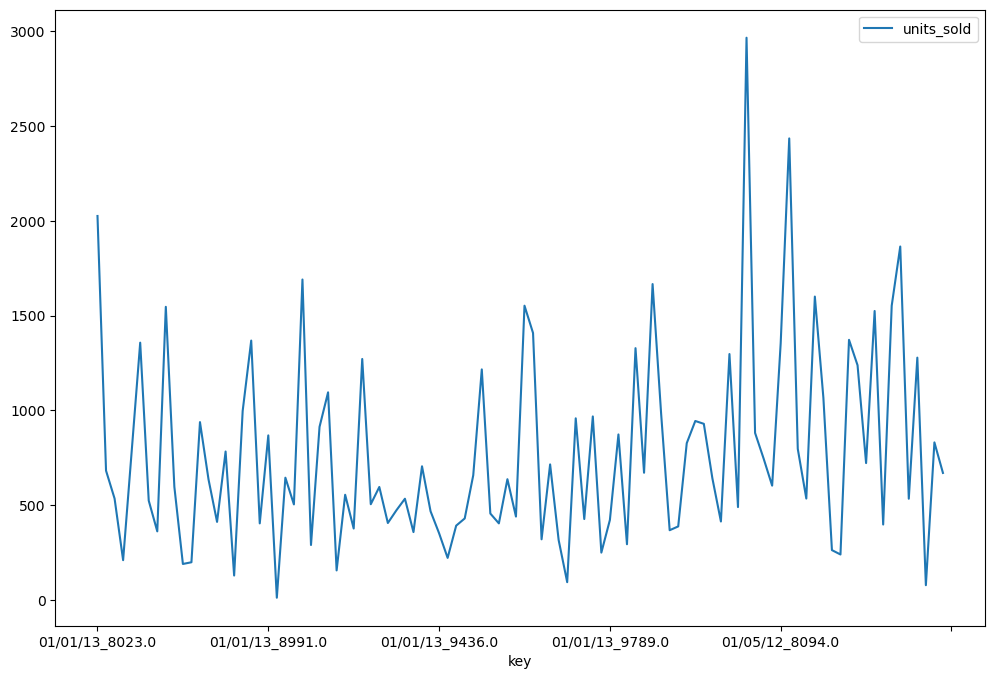

In [27]:
prep.df[:100].plot(figsize=(12,8))

# Converting supervised dataset

```units_sold``` becomes target variable

```day_1```, ```day_2```, ```day_3```, ```day_4``` becomes input

We will train our model to predict sales based on previous 4 days.

In [29]:
prep.df['day_1'] = prep.df['units_sold'].shift(-1)
prep.df['day_2'] = prep.df['units_sold'].shift(-2)
prep.df['day_3'] = prep.df['units_sold'].shift(-3)
prep.df['day_4'] = prep.df['units_sold'].shift(-4)

In [31]:
prep.df

,units_sold,day_1,day_2,day_3,day_4
key,,,,,
01/01/13_8023.0,2025.0,682.0,535.0,210.0,782.0
01/01/13_8058.0,682.0,535.0,210.0,782.0,1357.0
01/01/13_8063.0,535.0,210.0,782.0,1357.0,524.0
01/01/13_8091.0,210.0,782.0,1357.0,524.0,362.0
01/01/13_8094.0,782.0,1357.0,524.0,362.0,1546.0
...,...,...,...,...,...
31/10/11_9890.0,531.0,551.0,431.0,820.0,506.0
31/10/11_9909.0,551.0,431.0,820.0,506.0,NaN
31/10/11_9954.0,431.0,820.0,506.0,NaN,NaN


Remove NA data

In [33]:
df = prep.df.dropna()

<Axes: xlabel='key'>

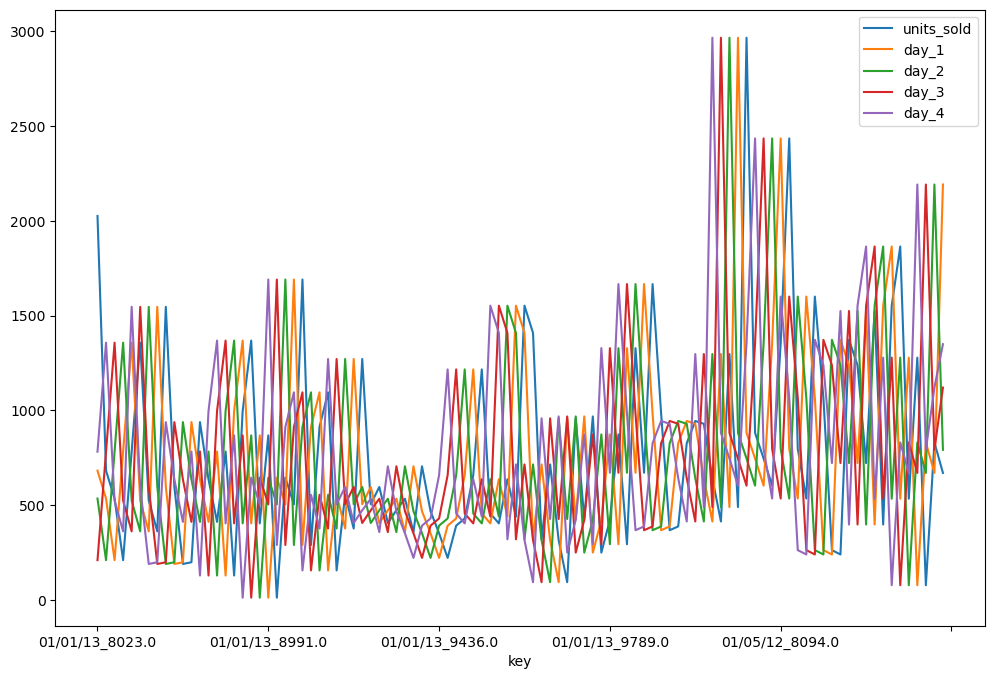

In [35]:
df[:100].plot(figsize=(12,8))

# Train-Test Split

In [37]:
x1, x2, x3, x4, y = df['day_1'], df['day_2'], df['day_3'], df['day_4'], df['units_sold']
x1, x2, x3, x4, y = np.array(x1), np.array(x2), np.array(x3), np.array(x4), np.array(y)
x1, x2, x3, x4, y = x1.reshape(-1,1), x2.reshape(-1,1), x3.reshape(-1,1), x4.reshape(-1,1), y.reshape(-1,1)

split_percentage = 15
test_split = int(len(df)*(split_percentage/100))
x = np.concatenate((x1, x2, x3, x4), axis=1)
X_train,X_test,y_train,y_test = x[:-test_split],x[-test_split:],y[:-test_split],y[-test_split:]

In [39]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8395, 4)
(1481, 4)
(8395, 1)
(1481, 1)


# Random Forest Regression

In [41]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [43]:
print("R Sq. Score for Random Forest Regression :", rf_regressor.score(X_test, y_test))

R Sq. Score for Random Forest Regression : 0.685899885533281


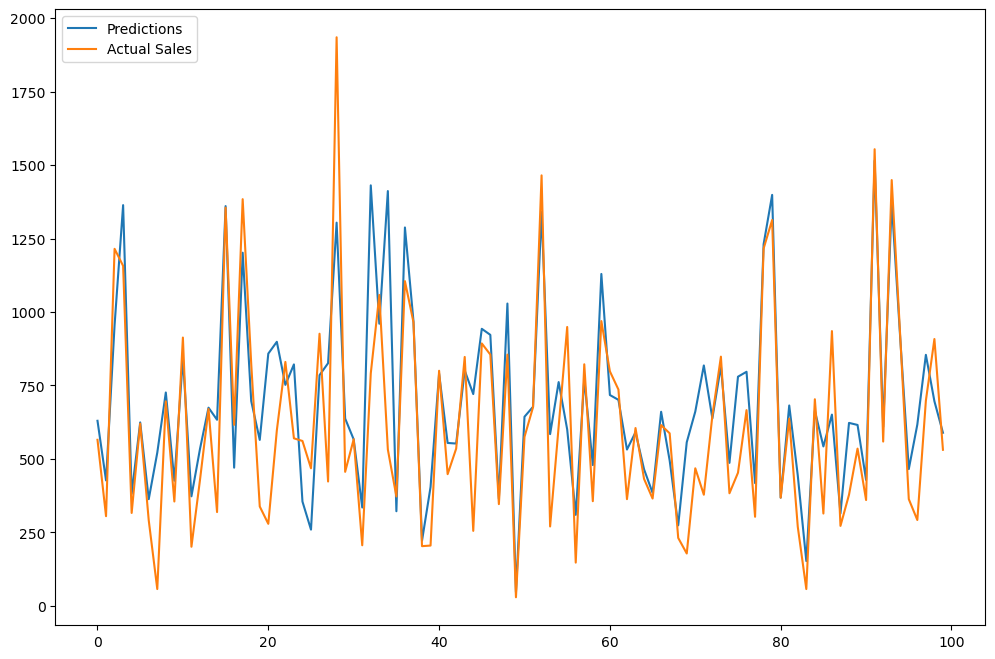

In [45]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(y_pred[-100:], label='Predictions')
plt.plot(y_test[-100:], label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

# XGBoost Regression

In [55]:
import xgboost
xgb_regressor = xgboost.XGBRegressor()
xgb_regressor.fit(X_train, y_train)

y_pred = xgb_regressor.predict(X_test)

In [57]:
print("R Sq. Score for XGBoost :", xgb_regressor.score(X_test, y_test))

R Sq. Score for XGBoost : 0.5962779753990961


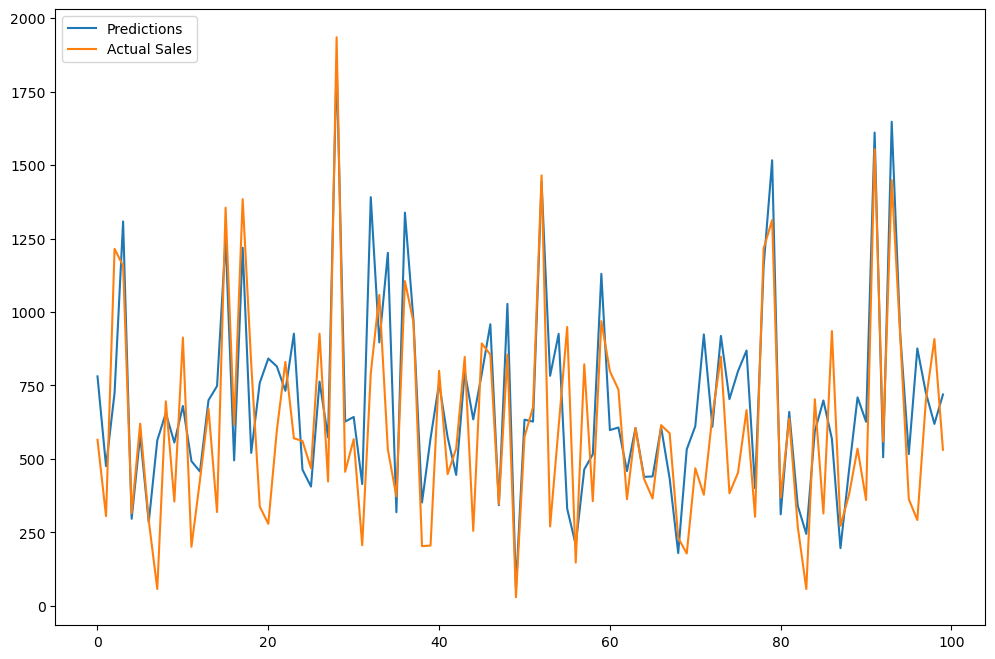

In [59]:
import matplotlib.pyplot as plt
plt.plot(y_pred[-100:], label='Predictions')
plt.plot(y_test[-100:], label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

# Hyperparameter Tuning for Random Forest

In [61]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 250, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(0, 120, num = 20)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [50, 72, 94, 116, 138, 161, 183, 205, 227, 250], 'max_features': ['auto', 'sqrt'], 'max_depth': [0, 6, 12, 18, 25, 31, 37, 44, 50, 56, 63, 69, 75, 82, 88, 94, 101, 107, 113, 120, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [63]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=0, n_jobs = -1)

In [65]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
21 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
17 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packages\

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [0, 6, 12, 18, 25, 31, 37,
                                                      44, 50, 56, 63, 69, 75,
                                                      82, 88, 94, 101, 107, 113,
                                                      120, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 72, 94, 116, 138,
                                                         161, 183, 205, 227,
                                                         250]},
                   random_state=0, verbose=2)

In [69]:
rf_random.best_params_

{'n_estimators': 205,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [71]:
best_random = rf_random.best_estimator_

In [73]:
y_pred = best_random.predict(X_test)

In [75]:
print("R Sq. Score for Random Forest Regression :", best_random.score(X_test, y_test))
print("Adj. R Sq. Score for Random Forest Regression :", 1 - (1 - best_random.score(X_test, y_test) ) * ( len(y_test) - 1 ) / ( len(y_test) - X_test.shape[1] - 1 ))

R Sq. Score for Random Forest Regression : 0.6746587380993456
Adj. R Sq. Score for Random Forest Regression : 0.6737770544627585


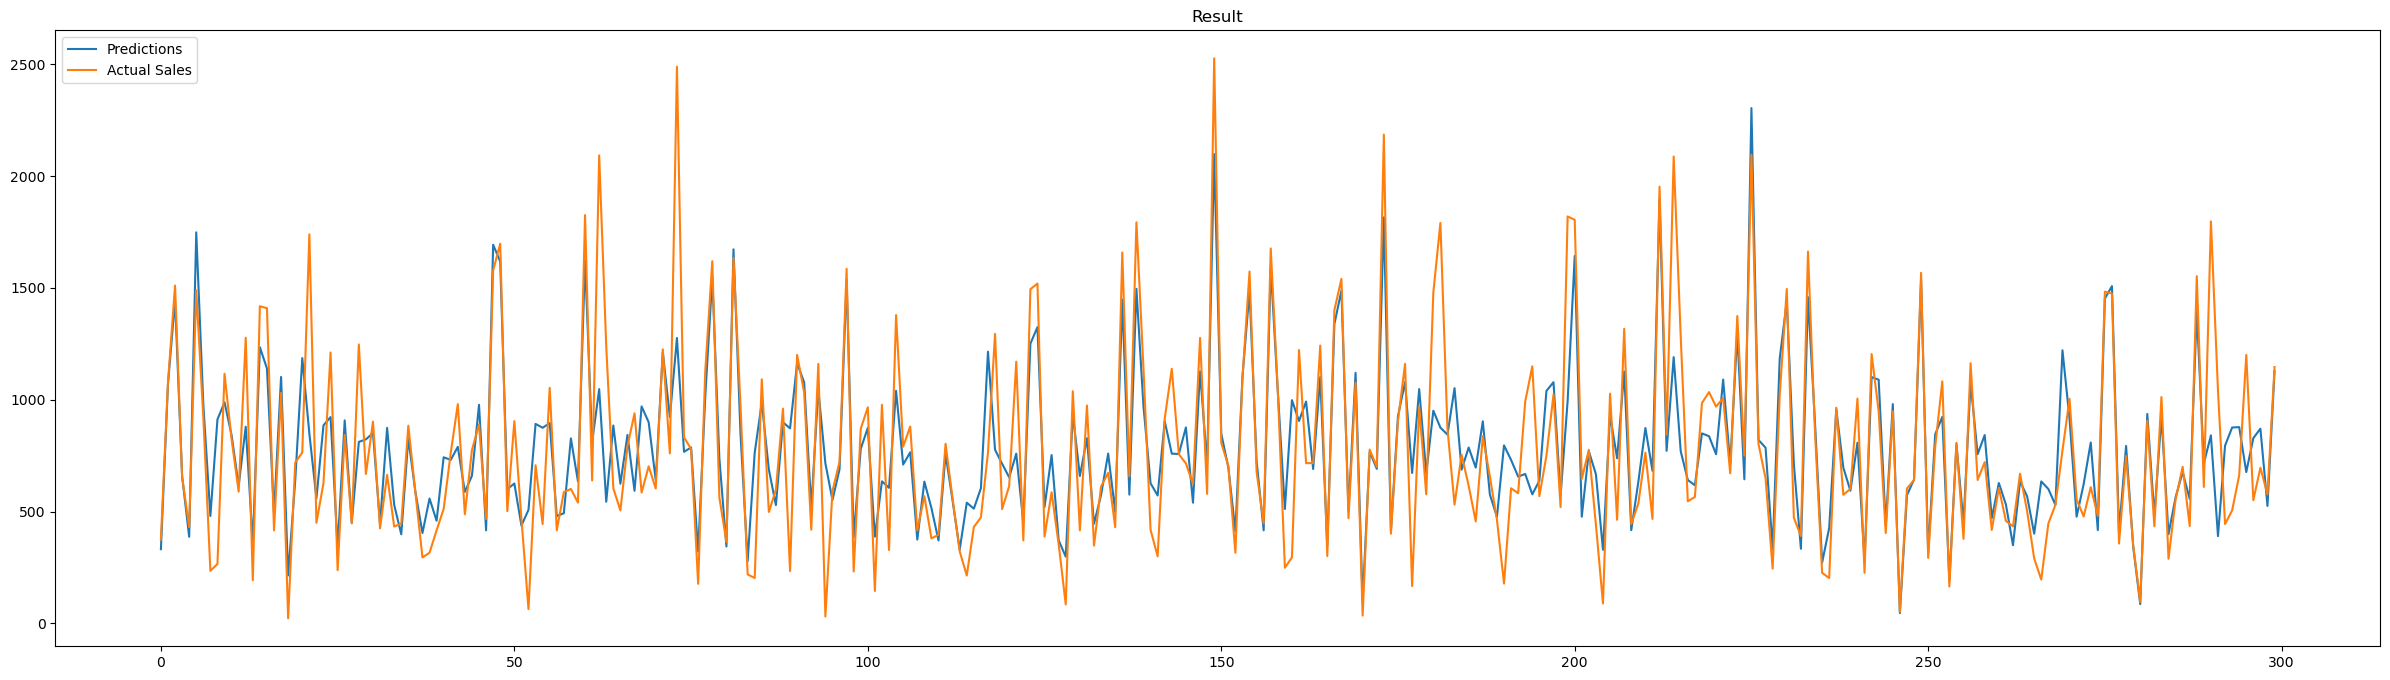

In [77]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30,8)
plt.plot(y_pred[500:800], label='Predictions')
plt.plot(y_test[500:800], label='Actual Sales')
plt.title("Result")
plt.legend(loc="upper left")
plt.savefig('final.png')
plt.show()